In [33]:
import pandas as pd
df = pd.read_csv('data.csv')
df.head(10)

,date,province,district,ward,long,lat
0,01/06/2020,Bắc Giang,Yên Dũng,Tiền Phong,106.17200,21.23800
1,26/05/2020,Lào Cai,Văn Bàn,Nậm Tha,104.41616,21.99459
2,26/05/2020,Sóc Trăng,Mỹ Tú,Hưng Phú,105.70397,9.64698
3,26/05/2020,Sơn La,Vân Hồ,Tân Xuân,104.70561,20.65930
4,26/05/2020,Bạc Liêu,Bạc Liêu,Vĩnh Trạch,105.76225,9.30437
5,26/05/2020,Bình Dương,Bàu Bàng,Lai Uyên,106.63067,11.23651
6,26/05/2020,Hà Tĩnh,TX. Kỳ Anh,P. Kỳ Long,106.41985,18.04084
7,26/05/2020,Hà Tĩnh,TX. Kỳ Anh,P. Kỳ Phương,106.43443,18.02518
8,20/05/2020,Quảng Ninh,Tiên Yên,Điền Xá,107.34000,21.39100
9,24/05/2020,Quảng Nam,Đại Lộc,Đại Nghĩa,108.08828,15.91556


In [34]:
type(df['date'][0])

str

In [35]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
int(df['date'][0].strftime('%m'))

6

In [37]:
df['province'].describe()

count      997218
unique         63
top       Gia Lai
freq       109950
Name: province, dtype: object

In [38]:
provinceName = set(df['province'].values)
provinceName

{'An Giang',
 'Bà Rịa-Vũng Tàu',
 'Bình Dương',
 'Bình Phước',
 'Bình Thuận',
 'Bình Định',
 'Bạc Liêu',
 'Bắc Giang',
 'Bắc Kạn',
 'Bắc Ninh',
 'Bến Tre',
 'Cao Bằng',
 'Cà Mau',
 'Cần Thơ',
 'Gia Lai',
 'Hà Giang',
 'Hà Nam',
 'Hà Nội',
 'Hà Tĩnh',
 'Hòa Bình',
 'Hưng Yên',
 'Hải Dương',
 'Hải Phòng',
 'Hậu Giang',
 'Hồ Chí Minh',
 'Khánh Hòa',
 'Kiên Giang',
 'Kon Tum',
 'Lai Châu',
 'Long An',
 'Lào Cai',
 'Lâm Đồng',
 'Lạng Sơn',
 'Nam Định',
 'Nghệ An',
 'Ninh Bình',
 'Ninh Thuận',
 'Phú Thọ',
 'Phú Yên',
 'Quảng Bình',
 'Quảng Nam',
 'Quảng Ngãi',
 'Quảng Ninh',
 'Quảng Trị',
 'Sóc Trăng',
 'Sơn La',
 'Thanh Hoá',
 'Thái Bình',
 'Thái Nguyên',
 'Thừa Thiên Huế',
 'Tiền Giang',
 'Trà Vinh',
 'Tuyên Quang',
 'Tây Ninh',
 'Vĩnh Long',
 'Vĩnh Phúc',
 'Yên Bái',
 'Điện Biên',
 'Đà Nẵng',
 'Đắk Lắk',
 'Đắk Nông',
 'Đồng Nai',
 'Đồng Tháp'}

In [39]:
# import csv
# l = len(df['date'].values)
# for y in range(2020,2021):
#     for m in range(7,13):
#         with open('data-{}-{}.csv'.format(y,m),'a') as f:
#             writer = csv.writer(f)
#             writer.writerow(['province','fire'])
#             for p in provinceName:
#                 fire = 0
#                 for i in range(l):
#                     if df['province'][i] == p and int(df['date'][i].strftime('%m')) == m and int(df['date'][i].strftime('%Y')) == y:
#                         fire += 1
#                 writer.writerow([p,fire])

In [40]:
Jan2008 = pd.read_csv('MonthlyData/data-2008-1.csv')
Jan2008

,Unnamed: 0,province,fire
0,0,Trà Vinh,0
1,1,Phú Thọ,2
2,2,Cà Mau,0
3,3,Thanh Hoá,0
4,4,Ninh Thuận,1
...,...,...,...
58,58,Tây Ninh,3
59,59,Bình Dương,0
60,60,Nam Định,0
61,61,Yên Bái,6


In [41]:
geoCsv = pd.read_csv('cleaned_density.csv')
del geoCsv['density']
geoCsv

,province
0,Hà Nội
1,Vĩnh Phúc
2,Bắc Ninh
3,Quảng Ninh
4,Hải Dương
...,...
58,Cần Thơ
59,Hậu Giang
60,Sóc Trăng
61,Bạc Liêu


In [42]:
provinceFire = set(Jan2008['province'])
provinceGeo = set(geoCsv['province'])
provinceFire - provinceGeo

set()

In [43]:
provinceGeo - provinceFire

set()

In [44]:
# corrections = {
#     'Bà Rịa-Vũng Tàu':'Bà Rịa - Vũng Tàu',
#     'Hòa Bình':'Hoà Bình',
#     'Hồ Chí Minh':'TP. Hồ Chí Minh', 
#     'Khánh Hòa':'Khánh Hoà', 
#     'Thừa Thiên Huế':'Thừa Thiên - Huế',
# }
# import glob 
# listFile = glob.glob('MonthlyData/*.csv')
# for i in range(len(listFile)):
#     f = pd.read_csv(listFile[i])
#     for p in range(len(f['province'])):
#         for c in corrections:
#             if f['province'][p] == c:
#                 f['province'][p] = corrections[c]
#     f.to_csv(listFile[i])

In [53]:
f = pd.read_csv('MonthlyData/data-2008-1.csv')
f

,Unnamed: 0,province,fire
0,0,Trà Vinh,0
1,1,Phú Thọ,2
2,2,Cà Mau,0
3,3,Thanh Hoá,0
4,4,Ninh Thuận,1
...,...,...,...
58,58,Tây Ninh,3
59,59,Bình Dương,0
60,60,Nam Định,0
61,61,Yên Bái,6


<AxesSubplot:>

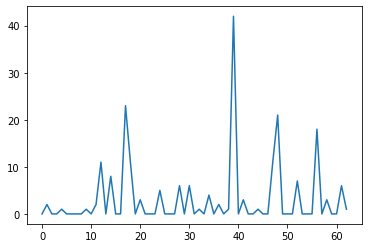

In [50]:
f['fire'].plot()

In [51]:
import json
vn = json.load(open('cleaned_geo.geojson','r'))

In [75]:
import glob
import plotly.express as px
import plotly.io as pio
pio.kaleido.scope.default_format = "png"

listFile = glob.glob('MonthlyData/*.csv')
for i in range(len(listFile)):
    f = pd.read_csv(listFile[i])
    time = listFile[i][(listFile[i].find('-')+1):listFile[i].find('.csv')]
    fig = px.choropleth(
        f, 
        geojson=vn, 
        locations="province",
        color="fire",
        featureidkey="properties.ten_tinh",
        hover_name="province",
        hover_data=['fire'],
        title="Vietnam Forest Fire ({})".format(time),
        color_continuous_scale="ylorrd",
        range_color=(0,100),
        labels={'fire':'Fire'},
        projection="mercator",
    )
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":0,"t":30,"l":30,"b":0})
    imageName = 'ImageFire/fig' + time + '.png'
    pio.write_image(fig,imageName,scale=2,width=1200,height=1200)